# Curso de Optimización (DEMAT)
## Parcial 2

| Descripción:                         | Fechas               |
|--------------------------------------|----------------------|
| Fecha de publicación del documento:  | **Mayo 25, 2022**    |
| Hora de inicio:                      | **15:00**            |
| Hora límite de entrega:              | **18:00**            |


### Indicaciones

Lea con cuidado los ejercicios.

Puede usar las notas de clase y las tareas hechas para resolver el examen.

Al final, entregue el notebook con sus respuestas, junto con los códigos que hagan falta para reproducir los resultados. Si es más de un archivo, genere un archivo ZIP que contenga el notebook y los scripts adicionales.

A partir del notebook genere un archivo PDF con las respuestas y envíelo por separado 
antes de la hora límite.


## Ejercicio 1. (5 puntos)

Sea 

$$ f(\mathbf{x}) = f(x_1, x_2) = 2x_1^{2} + x_2^{2} - x_1 x_2 - 6.5x_1  + 2.5x_2. $$

Considere el problema 

% $$ \min\; f(\mathbf{x}) \quad \text{sujeto a} \quad -1\leq x_1 \leq 1, \; -1\leq x_2 \leq 1.$$

Encontrar la solución usando un método de barrera logarítmica (Clase 25). 

Para esto construimos la función barrera logarítmica 

$$
b_{log}(\mathbf{x}; \mu) = f(x_1,x_2) + \frac{1}{\mu}(-log(1-x_1)-log(1-x_2)-log(1+x_1)-log(1+x_2) )
$$

1. Programar las funciones y sus gradientes

$$f(\mathbf{x}) \quad \text{y} \quad b_{log}(\mathbf{x}; \mu) $$ 

2. Programar el método de barrera  logarítmica:

a) Dar un punto inicial $\mathbf{x}_0$, la función $b_{log}(\mathbf{x}; \mu)$, su gradiente, $\mu_0$, una
   tolerancia $\tau>0$ y los parámetros que se necesiten para usar el método BFGS.

b) Hacer $k=0$ y repetir los siguientes pasos:

b1) Usando el método BFGS, calcular el mínimo $\mathbf{x}_{k+1}$ de $b_{log}(\mathbf{x}; \mu_k)$. Para
    el método BFGS use la tolerancia $\epsilon_m^{1/4}$ porque no necesitamos
    tener demasiada precisión en el cálculo. Además, para el algoritmo de 
    backtracking use $\alpha_{ini}=1$, para reducir la posibilidad de evaluar
    la función de barrera en puntos que están fuera de la región factible.

b2) Imprimir si el algoritmo BFGS encuentra la solución, y en ese caso imprimir

- el entero $k$
- el valor $\mu_k$,
- el número de iteraciones que realizó el algoritmo BFGS, 
- el punto $\mathbf{x}_{k+1}$ y 
- el valor  $f(\mathbf{x}_{k+1})$.

b3) Si $\|\mathbf{x}_{k+1} - \mathbf{x}_k\|<\tau$, terminar devolviendo  $\mathbf{x}_{k+1}$ 

b4) En caso contrario, hacer $\mu_{k+1} = 10\mu_k$, $k=k+1$ y volver al paso (b1)

3. Probar el algoritmo usando $\mathbf{x}_0 = (-0.75, 0.5)$, $\mu_0=1$ y $\tau=0.001$.

4. Si $(x_1^{k}, x_2^k)$ es el punto que devuelve el algoritmo de barrera 
   logarítmica y si está en
   frontera, genere la gráfica de la función evaluándola en puntos 
   sobre la arista en donde está punto para visualmente verificar que 
   tiene sentido el resultado.
   
### Solución:

In [49]:
import numpy as np

def f(x):
    return 2*x[0,0]**2 + x[0,1]**2 - x[0,0]*x[0,1]-6.5*x[0,0]+2.5*x[0,1]

def g(x):
    return np.array([[4*x[0,0]-x[0,1]-6.5,2*x[0,1]-x[0,0]+2.5*x[0,1]]])

def b_log(x, mu):
    if(x[0,0] < -1 or x[0,0] > 1):
        return np.nan
    if(x[0,1] < -1 or x[0,1] > 1):
        return np.nan
    return f(x) - (sum(np.log(1-x.squeeze()))+sum(np.log(1+x.squeeze())))/mu

def g_b_log(x, mu):
    return g(x) + 1/mu*np.array([[1/(1-x[0,0])+1/(1+x[0,0]),1/(1-x[0,1])+1/(1+x[0,1])]])

def backtracking(f, f_k, gf_k, x_k, p_k, alpha, ro, c):
    ff = f(x_k + alpha*p_k)
    while (ff is np.NAN):
        alpha = alpha / 2
        ff = f(x_k + alpha*p_k)
    while (ff > f_k + c*alpha*gf_k@p_k.T):
        alpha = ro*alpha
        ff = f(x_k + alpha*p_k)
        while (ff is np.NAN):
            alpha = alpha / 2
            ff = f(x_k + alpha*p_k)
    return alpha

def BFGS(x_0, tol, f, g, H_0, MAX_IT):
    k = 0
    x_k = np.copy(x_0)
    H_k = np.copy(H_0)
    N, N = H_k.shape
    I = np.identity(N)
    res = 0
    
    while k < MAX_IT:
        g_k = g(x_k)

        if np.linalg.norm(g_k) < tol:
            res = 1
            break
        
        p_k = - g_k @ H_k.T
        print("p_k", p_k)
        print("x_k", x_k)
        alpha_k = backtracking(f, f(x_k), g_k, x_k, p_k, 1, 0.8, 0.001)
        x_k_1 = x_k + alpha_k * p_k
        print("alpha_k", alpha_k)
        g_k_1 = g(x_k_1)
        s_k = x_k_1 - x_k
        y_k = g_k_1 - g_k

        print("y_k", y_k)
        print("s_k", s_k)
        rhok = 1 / (y_k@s_k.T)[0,0]
        print("rhok", rhok)
        H_k_1 = ( (I - rhok*(s_k.T@y_k)) @ H_k @ (I - rhok*(y_k.T@s_k)) + rhok*(s_k.T@s_k) )
        
        k = k + 1
        x_k = x_k_1
        H_k = H_k_1
        g_k = g_k_1

    return res, k, x_k

def logarithm_barrier(x_0, b_log, g_b_log, mu_0, tol, H_0):
    mu_k = mu_0
    x_k = x_0
    k = 0
    while 1 == 1:
        res, kk, x_k_1 = BFGS(x_0, tol, lambda x : b_log(x,mu_k), lambda x : g_b_log(x,mu_k), H_0, 5000)
        if res == 1:
            print(k, mu_k, kk, x_k_1, b_log(x_k_1,mu_k))
        if np.linalg.norm(x_k_1-x_k) < tol:
            return x_k_1
        mu_k = 10*mu_k
        x_k = x_k_1
        k = k+1

    return 1

x_0 = np.array([[-0.75,0.5]])
mu_0 = 1
H_0 = np.identity(2)
tol = 0.0001
logarithm_barrier(x_0, b_log, g_b_log, mu_0, tol, H_0)
# gg = lambda x : g_b_log(x,mu_0).squeeze()
# print(gg(x_0))

p_k [[ 5.42857143 -5.66666667]]
x_k [[-0.75  0.5 ]]
alpha_k 0.25
y_k [[5.44148629 2.12292961]]
s_k [[ 1.35714286 -1.41666667]]
rhok 0.22844659786536664
p_k [[ 21.47845542 -49.86363481]]
x_k [[ 0.60714286 -0.91666667]]
alpha_k 9.303535670983855e-19
y_k [[0. 0.]]
s_k [[0. 0.]]
rhok inf
p_k [[nan nan]]
x_k [[ 0.60714286 -0.91666667]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alp

C:\Users\batma\AppData\Local\Temp\ipykernel_13440\700334370.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1 / (y_k@s_k.T)[0,0]
C:\Users\batma\AppData\Local\Temp\ipykernel_13440\700334370.py:61: RuntimeWarning: invalid value encountered in multiply
  H_k_1 = ( (I - rhok*(s_k.T@y_k)) @ H_k @ (I - rhok*(y_k.T@s_k)) + rhok*(s_k.T@s_k) )



alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alpha_k 1
y_k [[nan nan]]
s_k [[nan nan]]
rhok nan
p_k [[nan nan]]
x_k [[nan nan]]
alp

KeyboardInterrupt: 

_

```







```

---

## Ejercicio 2. (5 puntos)

Consideremos la función $f(z; x_1, ...,  x_{rs})$ definida por una combinación lineal de funciones trigonométricas:

$$
\begin{array}{rcl}
f(z; x_1, ...,  x_{rs}) &=&
x_1 \sin(\omega_1 z + \phi_1) + ... + x_{r} \sin(\omega_1 z + \phi_r)\\
& & + x_{r+1} \sin(\omega_2 z + \phi_1) + ... + x_{2r} \sin(\omega_2 z + \phi_r) \\
& & + ... \\
& & + x_{r(s-1)+1} \sin(\omega_{s}  z + \phi_1) + ... + x_{rs} \sin(\omega_{s} z + \phi_r)
\end{array}
$$

Para $ x_1, ...,  x_{rs}$ fijos y unos puntos $z_1, z_2, ..., z_m$ datos, calculamos 
$b_i = f(z_i; x_1, ...,  x_{rs})$ para $i=1,2,...,m$. Es decir, si construimos la matriz 

$$
\left(
\begin{array}{l}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{array}
\right)
=
\left[
\begin{array}{rrrrrr}
 \sin(\omega_1 z_1 + \phi_1) & \cdots & \sin(\omega_1 z_1 + \phi_r) & \sin(\omega_2 z_1 + \phi_1) &\cdots & \sin(\omega_{s} z_1 + \phi_r) \\
 \sin(\omega_1 z_2 + \phi_1) & \cdots & \sin(\omega_1 z_2 + \phi_r) & \sin(\omega_2 z_2 + \phi_1) &\cdots & \sin(\omega_{s} z_2 + \phi_r) \\
 \vdots                      & \cdots & \vdots                      & \vdots                      &\cdots & \vdots \\
 \sin(\omega_1 z_m + \phi_1) & \cdots & \sin(\omega_1 z_m + \phi_r) & \sin(\omega_2 z_m + \phi_1) &\cdots & \sin(\omega_{s} z_m + \phi_r) 
\end{array}
\right]
\left(
\begin{array}{l}
x_1 \\ x_2 \\ \vdots \\ x_{rs}
\end{array}
\right)
$$

Es decir,

$$ \mathbf{b} = \mathbf{A} \mathbf{x} $$

El siguiente código contruye la matriz $\mathbf{A}$,  propone un vector $\mathbf{x}_{real}$ y genera el vector  
$\mathbf{b} = \mathbf{A} \mathbf{x}_{real}$. 


Vector de frecuencias omega:
 [0.5        0.57894737 0.65789474 0.73684211 0.81578947 0.89473684
 0.97368421 1.05263158 1.13157895 1.21052632 1.28947368 1.36842105
 1.44736842 1.52631579 1.60526316 1.68421053 1.76315789 1.84210526
 1.92105263 2.        ]

Vector de ángulos de fase phi:
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]

Dimensiones de la matriz A: (15, 200)


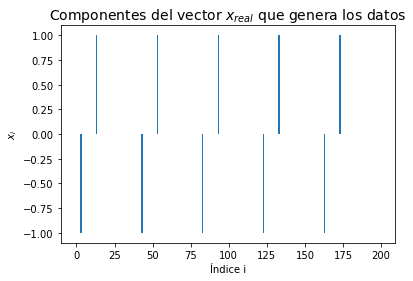

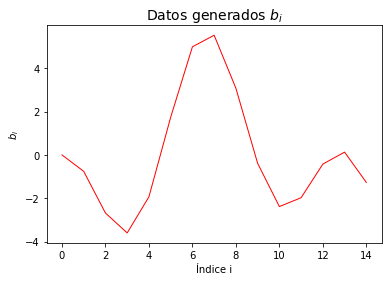

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Evalua cada función trigonométrica. 
def fnctrig(x, fparam):
    omega = fparam['omega']
    phi   = fparam['phi']
    return np.sin(omega*x + phi)

m    = 15   # Número de puntos z_i
r    = 10   # Número de angulos phi
s    = 20   # Número de frecuencias omega

z     = np.linspace(0, 9, m)
phi   = np.linspace(0, np.pi, r)
omega = np.linspace(0.5, 2.0, s)

print('Vector de frecuencias omega:\n', omega)
print('\nVector de ángulos de fase phi:\n', phi)

n  = r*s

# Se crea la matriz A 
A  = np.zeros((m, n))
for i,z_i in enumerate(z):
    mc = 0
    for j,phi_j in enumerate(phi):
        for l,omega_l in enumerate(omega):
            fparam   = {'omega':omega_l, 'phi':phi_j}
            A[i,mc] = fnctrig(z_i, fparam)
            mc += 1

x_real = np.zeros(n)
nc = 1 
for i in range(n):
    if i%r==3 and (i//s)%2==0:
        x_real[i] = (-1)**nc
        nc  += 1

b  = A @ x_real

print('\nDimensiones de la matriz A:', A.shape)

plt.figure()
plt.bar(np.arange(n), np.squeeze(x_real))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{real}$ que genera los datos', fontsize=14)

plt.figure()
plt.plot(np.arange(m), b, 'r', linewidth=1)
plt.xlabel('Índice i')
plt.ylabel(r'$b_i$')
_=plt.title(r'Datos generados $b_i$', fontsize=14)

Dados la matriz $\mathbf{A}$ y el vector $\mathbf{b}$, queremos calcular un vector $\mathbf{x}$ tal que 

$$ \mathbf{b} = \mathbf{A} \mathbf{x}. $$

Como $\mathbf{A}$ es de tamaño $m \times n$, con $m<n$, no se puede resolver 
el sistema de ecuaciones o aplicar el método de mínimos cuadrados.

Como hay es un sistema subdeterminado, puede haber una infinidad de soluciones
Una manera obtener un vector $\mathbf{x}$ se seleccionar aquel que satisface
el sistema y tiene norma mínima (para que no ocurra como en las soluciones
de mínimos cuadrados en los que las componentes toman valores en el orden de 
decenas de miles mientras que el componentes de $\mathbf{b}$ están en orden
de unidades). Así se puede plantear el problema

$$  \min \|\mathbf{x}\|_2 \quad \text{sujeto a} \quad \mathbf{A} \mathbf{x} = \mathbf{b}. $$

Se puede ver que la solución de este problema está dada por (medio punto adicional 
si hacen la deducción)

$$ \mathbf{x}_{mn2} = \mathbf{A}^\top(\mathbf{A}\mathbf{A}^\top)^{-1} \mathbf{b}.$$

El problema es que esta solución no es rala,
es decir, que la mayoría de sus componentes son cero, tal como el
vector $\mathbf{x}_{real}$ que generó los datos $\mathbf{b}$.


El método "basis pursuit" propone calcular calcular $\mathbf{x}$ resolviendo el problema

$$  \min \|\mathbf{x}\|_1 \quad \text{sujeto a} \quad \mathbf{A} \mathbf{x} = \mathbf{b}. $$

Al minimizar la suma de valores absolutos de las variables $x_i$, se espera que la mayoría de éstas se hagan cero para reducir la suma, en especial si usamos 
un método como el método simplex que calcula soluciones básicas factibles
(todas la variables no básicas son cero).

Este problema lo podemos plantear como un problema de programación lineal, expresando el vector 
$\mathbf{x}$ como la resta de dos nuevos vectores de variables $\mathbf{u}$  y $\mathbf{v}$  no negativos:

$$ \mathbf{x} = \mathbf{u} - \mathbf{v}.$$

Así, se plantea el problema de programación lineal


$$  \min \; 
\mathbf{c}^\top 
\left(
\begin{array}{l}
\mathbf{u}  \\ \mathbf{v}
\end{array}
\right)
\quad \text{sujeto a} \quad 
[\mathbf{A}\;\; -\mathbf{A}] 
\left(
\begin{array}{l}
\mathbf{u}  \\ \mathbf{v}
\end{array}
\right)
= \mathbf{b}, \quad (\mathbf{u}, \mathbf{v}) \geq  \mathbf{0}, $$

donde $\mathbf{c}$ es el vector con todas sus componentes iguales a 1.

1. Calcule la solución de mínima norma 2, 

$$ \mathbf{x}_{mn2}. $$

-  Imprima el valor del error $\|\mathbf{A} \mathbf{x}-\mathbf{b}\|$
-  Grafique las entradas del vector mínima norma 2 para que
   pueda constatar que no es vector ralo y que no tiene parecido 
   con $\mathbf{x}_{real}$.
   
2. Resuelva el problema de programación lineal con alguna librería de Python.
3. Construya y resuelva el problema dual para obtener el vector $\lambda$ y 
   defina $\mathbf{s}$ como las variables de holgura del problema dual.
4. Verique si se cumplen las condiciones KKT para la variable primal $(\mathbf{u}, \mathbf{v})$
   y las variables duales  $(\lambda, \mathbf{s})$ (pueden que no se cumplan
   si la librería envió warnings sobre el mal condicionamiento de una matriz). 
5. Imprima y compare los valores de la función objetivo del problema 
   primal y del problema dual.
6. Calcule $\mathbf{x} = \mathbf{u} - \mathbf{v}$. Imprima el error $\|\mathbf{A} \mathbf{x}-\mathbf{b}\|$
   y grafique las entradas del vector $\mathbf{x}$.
   Comparado con la gráfica de $\mathbf{x}_{real}$, describa las similutudes
   o diferencias, y si menos 
   se cumple que es un vector ralo, que era el propósito original de cambiar
   la norma 2 por la norma 1 en la función objetivo del problema.
7. Repita los pasos 2 al 6, cambiando $m=50$. Vuelva a ejecutar el código 
   que genera a la matriz $\mathbf{A}$ y al vector $\mathbf{b}$.
   Describa si hay algún cambio en los resultados por el hecho de tener
   más ecuaciones.
   

### Solución:

x_(mn2) = [ 0.1407288   0.20800105  0.07497326  0.03897606 -0.14984309 -0.1579133
 -0.1796099  -0.32392657 -0.49514563 -0.41524146 -0.54904685 -0.66279104
 -0.66929479 -0.60472257 -0.40688549 -0.33549669 -0.23224746  0.01883244
  0.31250404  0.46481071  0.17686542  0.16827353  0.21460675  0.05604343
 -0.08874239 -0.10747505 -0.09041844 -0.08467594 -0.18223434 -0.30712033
 -0.35791697 -0.46314906 -0.54802554 -0.53516847 -0.49815201 -0.50089823
 -0.48165445 -0.23117705  0.11606785  0.46251445  0.32982741  0.25004827
  0.11476302  0.03843283 -0.0405359  -0.00491708  0.04923279 -0.01640039
 -0.03382106 -0.11902186 -0.23626288 -0.30265632 -0.39229428 -0.46440437
 -0.4253816  -0.54986464 -0.63165384 -0.47331046 -0.18744615  0.15639637
  0.36361205  0.19929291  0.16648612  0.06309553  0.07674158  0.15179307
  0.10528184  0.18787162  0.16024781  0.0491207  -0.01299018 -0.1164364
 -0.07871922 -0.25297185 -0.43483683 -0.56263773 -0.76619538 -0.66876021
 -0.25510258  0.21571405  0.29698893  0.210

C:\Users\batma\AppData\Local\Temp\ipykernel_13440\665437207.py:23: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  status = linprog(c, A_eq=AAA, b_eq=b)
C:\Users\batma\AppData\Local\Temp\ipykernel_13440\665437207.py:23: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  status = linprog(c, A_eq=AAA, b_eq=b)
C:\Users\batma\AppData\Local\Temp\ipykernel_13440\665437207.py:23: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  status = linprog(c, A_eq=AAA, b_eq=b)
c:\Program Files\Python310\lib\site-packages\scipy\op

Optimization terminated successfully.
x = [9.09831851e-11 1.04824663e-10 9.70226188e-11 8.68146920e-11
 8.24001677e-11 8.63847573e-11 1.01069195e-10 1.22143004e-10
 1.21528925e-10 1.09675113e-10 9.83376466e-11 9.08138103e-11
 9.74280493e-11 1.25777369e-10 1.59453688e-10 1.43289607e-10
 9.64393174e-11 8.28976944e-11 1.06626928e-10 1.06236026e-10
 9.55633253e-11 9.99891035e-11 8.77366946e-11 7.75495699e-11
 7.24561213e-11 8.24402020e-11 1.00523216e-10 1.19985505e-10
 1.16592882e-10 1.08527270e-10 1.01778539e-10 1.03860830e-10
 1.30054670e-10 1.82241526e-10 2.09085155e-10 1.63148398e-10
 9.60896482e-11 8.23885504e-11 1.02784870e-10 1.07363582e-10
 1.01707291e-10 9.47477124e-11 7.96559446e-11 6.29972477e-11
 6.05701325e-11 8.04489954e-11 1.00370728e-10 1.15465178e-10
 1.11784065e-10 1.06680360e-10 1.05762562e-10 1.22350258e-10
 1.71858821e-10 2.59750908e-10 2.41021010e-10 1.75416294e-10
 9.65348055e-11 8.39461909e-11 9.99832982e-11 1.08102759e-10
 1.09498206e-10 9.05340230e-11 6.96565748e-

Text(0.5, 1.0, 'Componentes del vector $x$ que genera los datos')

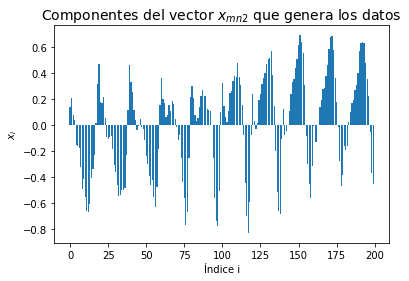

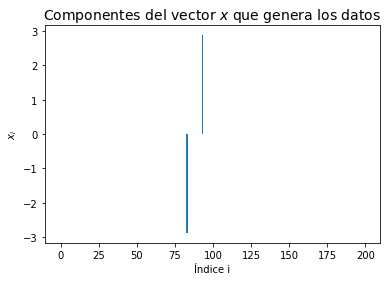

In [22]:
x_mn2 = A.T@np.linalg.inv(A@A.T)@b
print("x_(mn2) =", x_mn2)
print("||Ax-b|| = ", np.linalg.norm(A@x_mn2-b))
plt.figure()
plt.bar(np.arange(n), np.squeeze(x_mn2))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{mn2}$ que genera los datos', fontsize=14)

from scipy.optimize import linprog

def report(AAA, b, c, e_i, tol, bounds = [], dual = 0):

    if e_i == 1:
        if(len(bounds) > 0):
            status = linprog(c, A_ub=AAA, b_ub=b, bounds = bounds)
        else:
            status = linprog(c, A_ub=AAA, b_ub=b)
    else:
        if(len(bounds) > 0):
            status = linprog(c, A_eq=AAA, b_eq=b, bounds = bounds)
        else:
            status = linprog(c, A_eq=AAA, b_eq=b)


    print(status.message)
    if status.success == 1:
        print("x =", status.x)
        print("c^Tx =", c@np.array([status.x]).T)
        dif = (status.slack if e_i == 1 else status.con)
        print("s =", dif)
        if(dual == 0):
            print("||Ax-b|| =", np.linalg.norm(dif))
            e_x = sum(np.abs(status.x[status.x < 0]))
            e_bAx = sum(np.abs(dif[dif < 0]))
            print("E_x =", e_x, ", la condición de no negatividad" + (" no" if e_x >= tol else "") + " se cumple")
            if e_i == 1:
                print("E_(b-Ax) =", e_bAx, ", la restricciónes de desigualdad" + ("no" if e_bAx >= tol else "") + " se cumplen")
        return status
    else:
        return -1

N = n
c = np.ones(2*N)

AA = np.concatenate((A,-A),axis=1)

print("PROMBLEMA LINEAL")
xx = report(AA,b,c,0,np.finfo(float).eps**(1/2))
u,v = xx.x[:N],xx.x[N:]
lamb_bounds = [(None, None)]*len(b)
print("PROMBLEMA DUAL")
tlambda = report(AA.T, c, -b, 1, np.finfo(float).eps**(1/2), lamb_bounds, 1)

def dual_report(A, b, c, status_x, status_lambda, tol):
    
    print("|c^Tx - b^t(lambda)|/|c^Tx| =",np.abs(c@np.array([status_x.x]).T - b@np.array([status_lambda.x]).T)/np.abs(c@np.array([status_x.x]).T))
    print("||A^T+s-c|| = 0")
    print("||Ax-b|| =", np.linalg.norm(status_x.con))
    e_x = sum(np.abs(status_x.x[status_x.x < 0]))
    e_s = sum(np.abs(status_lambda.slack[status_lambda.slack < 0]))
    print("E_x =", e_x, ", la condición de no negatividad" + (" no" if e_x >= tol else "") + " se cumple")
    print("E_s =", e_s, ", la condición de no negatividad" + (" no" if e_s >= tol else "") + " se cumple")
    e_xs = sum(np.abs(status_x.x*status_lambda.slack))
    print("Sum_i |x_is_i| = ", e_xs, ", la condición de complementaridad" + (" no" if e_xs >= tol else "") + " se cumple")
    
dual_report(AA, b, c, xx, tlambda, 0.0001)

x = u - v
print("||Ax-b|| =", np.linalg.norm(A@x.T-b))
plt.figure()
plt.bar(np.arange(n), np.squeeze(x))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x$ que genera los datos', fontsize=14)


Los picos de las gráficas $x_real$ y los de $x_mn2$ parecen coincidir, así como donde se concentran los datos de $x$ coinciden con los de $x_xmn2$. Ahora podemos ver que las gráficas de $x$ y $x_real$ se parecen aún mas, ambas tiene picos más "agresivos" pero puesto que $x$ se cálculo minimizando la norma $1$ esto máxima los $0$ por lo que perdimos algunos picos.

Vector de frecuencias omega:
 [0.5        0.57894737 0.65789474 0.73684211 0.81578947 0.89473684
 0.97368421 1.05263158 1.13157895 1.21052632 1.28947368 1.36842105
 1.44736842 1.52631579 1.60526316 1.68421053 1.76315789 1.84210526
 1.92105263 2.        ]

Vector de ángulos de fase phi:
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]

Dimensiones de la matriz A: (60, 200)


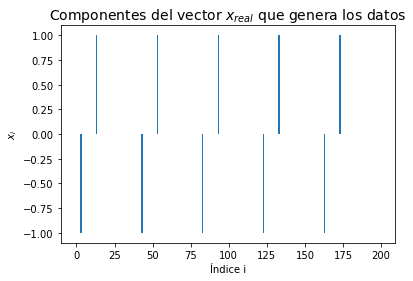

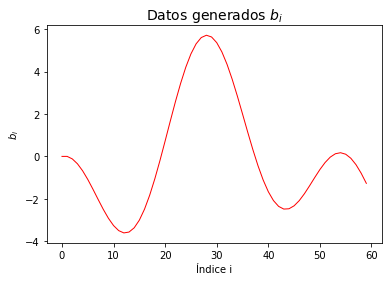

In [16]:
m    = 60   # Número de puntos z_i
r    = 10   # Número de angulos phi
s    = 20   # Número de frecuencias omega

z     = np.linspace(0, 9, m)
phi   = np.linspace(0, np.pi, r)
omega = np.linspace(0.5, 2.0, s)

print('Vector de frecuencias omega:\n', omega)
print('\nVector de ángulos de fase phi:\n', phi)

n  = r*s

# Se crea la matriz A 
A  = np.zeros((m, n))
for i,z_i in enumerate(z):
    mc = 0
    for j,phi_j in enumerate(phi):
        for l,omega_l in enumerate(omega):
            fparam   = {'omega':omega_l, 'phi':phi_j}
            A[i,mc] = fnctrig(z_i, fparam)
            mc += 1

x_real = np.zeros(n)
nc = 1 
for i in range(n):
    if i%r==3 and (i//s)%2==0:
        x_real[i] = (-1)**nc
        nc  += 1

b  = A @ x_real

print('\nDimensiones de la matriz A:', A.shape)

plt.figure()
plt.bar(np.arange(n), np.squeeze(x_real))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{real}$ que genera los datos', fontsize=14)

plt.figure()
plt.plot(np.arange(m), b, 'r', linewidth=1)
plt.xlabel('Índice i')
plt.ylabel(r'$b_i$')
_=plt.title(r'Datos generados $b_i$', fontsize=14)

x_(mn2) = [ 0.1407288   0.20800105  0.07497326  0.03897606 -0.14984309 -0.1579133
 -0.1796099  -0.32392657 -0.49514563 -0.41524146 -0.54904685 -0.66279104
 -0.66929479 -0.60472257 -0.40688549 -0.33549669 -0.23224746  0.01883244
  0.31250404  0.46481071  0.17686542  0.16827353  0.21460675  0.05604343
 -0.08874239 -0.10747505 -0.09041844 -0.08467594 -0.18223434 -0.30712033
 -0.35791697 -0.46314906 -0.54802554 -0.53516847 -0.49815201 -0.50089823
 -0.48165445 -0.23117705  0.11606785  0.46251445  0.32982741  0.25004827
  0.11476302  0.03843283 -0.0405359  -0.00491708  0.04923279 -0.01640039
 -0.03382106 -0.11902186 -0.23626288 -0.30265632 -0.39229428 -0.46440437
 -0.4253816  -0.54986464 -0.63165384 -0.47331046 -0.18744615  0.15639637
  0.36361205  0.19929291  0.16648612  0.06309553  0.07674158  0.15179307
  0.10528184  0.18787162  0.16024781  0.0491207  -0.01299018 -0.1164364
 -0.07871922 -0.25297185 -0.43483683 -0.56263773 -0.76619538 -0.66876021
 -0.25510258  0.21571405  0.29698893  0.210

C:\Users\batma\AppData\Local\Temp\ipykernel_13440\2397109568.py:23: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  status = linprog(c, A_eq=AAA, b_eq=b)
C:\Users\batma\AppData\Local\Temp\ipykernel_13440\2397109568.py:23: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  status = linprog(c, A_eq=AAA, b_eq=b)
C:\Users\batma\AppData\Local\Temp\ipykernel_13440\2397109568.py:23: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  status = linprog(c, A_eq=AAA, b_eq=b)
c:\Program Files\Python310\lib\site-packages\scipy

Text(0.5, 1.0, 'Componentes del vector $x$ que genera los datos')

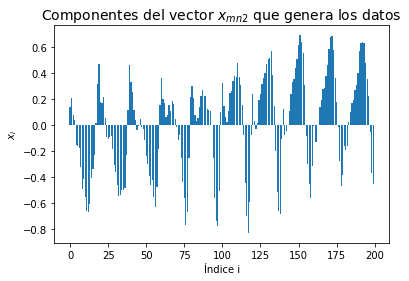

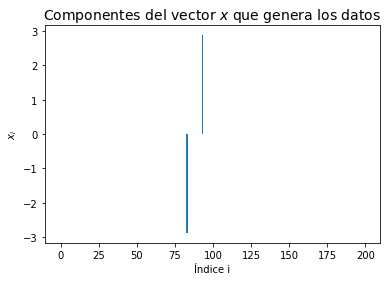

In [17]:
x_mn2 = A.T@np.linalg.inv(A@A.T)@b
print("x_(mn2) =", x_mn2)
print("||Ax-b|| = ", np.linalg.norm(A@x_mn2-b))
plt.figure()
plt.bar(np.arange(n), np.squeeze(x_mn2))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x_{mn2}$ que genera los datos', fontsize=14)

from scipy.optimize import linprog

def report(AAA, b, c, e_i, tol, bounds = [], dual = 0):

    if e_i == 1:
        if(len(bounds) > 0):
            status = linprog(c, A_ub=AAA, b_ub=b, bounds = bounds)
        else:
            status = linprog(c, A_ub=AAA, b_ub=b)
    else:
        if(len(bounds) > 0):
            status = linprog(c, A_eq=AAA, b_eq=b, bounds = bounds)
        else:
            status = linprog(c, A_eq=AAA, b_eq=b)


    print(status.message)
    if status.success == 1:
        print("x =", status.x)
        print("c^Tx =", c@np.array([status.x]).T)
        dif = (status.slack if e_i == 1 else status.con)
        print("s =", dif)
        if(dual == 0):
            print("||Ax-b|| =", np.linalg.norm(dif))
            e_x = sum(np.abs(status.x[status.x < 0]))
            e_bAx = sum(np.abs(dif[dif < 0]))
            print("E_x =", e_x, ", la condición de no negatividad" + (" no" if e_x >= tol else "") + " se cumple")
            if e_i == 1:
                print("E_(b-Ax) =", e_bAx, ", la restricciónes de desigualdad" + ("no" if e_bAx >= tol else "") + " se cumplen")
        return status
    else:
        return -1

N = n
c = np.ones(2*N)

AA = np.concatenate((A,-A),axis=1)

print("PROMBLEMA LINEAL")
xx = report(AA,b,c,0,np.finfo(float).eps**(1/2))
u,v = xx.x[:N],xx.x[N:]
lamb_bounds = [(None, None)]*len(b)
print("PROMBLEMA DUAL")
tlambda = report(AA.T, c, -b, 1, np.finfo(float).eps**(1/2), lamb_bounds, 1)

def dual_report(A, b, c, status_x, status_lambda, tol):
    
    print("|c^Tx - b^t(lambda)|/|c^Tx| =",np.abs(c@np.array([status_x.x]).T - b@np.array([status_lambda.x]).T)/np.abs(c@np.array([status_x.x]).T))
    print("||A^T+s-c|| = 0")
    print("||Ax-b|| =", np.linalg.norm(status_x.con))
    e_x = sum(np.abs(status_x.x[status_x.x < 0]))
    e_s = sum(np.abs(status_lambda.slack[status_lambda.slack < 0]))
    print("E_x =", e_x, ", la condición de no negatividad" + (" no" if e_x >= tol else "") + " se cumple")
    print("E_s =", e_s, ", la condición de no negatividad" + (" no" if e_s >= tol else "") + " se cumple")
    e_xs = sum(np.abs(status_x.x*status_lambda.slack))
    print("Sum_i |x_is_i| = ", e_xs, ", la condición de complementaridad" + (" no" if e_xs >= tol else "") + " se cumple")
    
dual_report(AA, b, c, xx, tlambda, 0.0001)

x = u - v
print("||Ax-b|| =", np.linalg.norm(A@x.T-b))
plt.figure()
plt.bar(np.arange(n), np.squeeze(x))
plt.xlabel('Índice i')
plt.ylabel(r'$x_i$')
plt.title(r'Componentes del vector $x$ que genera los datos', fontsize=14)

Los picos de las gráficas $x_real$ y los de $x_mn2$ parecen coincidir, así como donde se concentran los datos de $x$ coinciden con los de $x_xmn2$. Ahora podemos ver que las gráficas de $x$ y $x_real$ se parecen aún mas, ambas tiene picos más "agresivos" pero puesto que $x$ se cálculo minimizando la norma $1$ esto máxima los $0$ por lo que perdimos algunos picos.